In [1]:
# The Stanard Hodgepodge of Imports for Python
import qutip as qt
import qutip.states as qts
import qutip.operators as qto
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import seaborn as sns
from functools import reduce
from functools import partial
from scipy.stats import entropy as entropy
import networkx as nx
import numpy as np

sys.path.append("../dwaveutils/dwavetools")
sys.path.append("../dwaveutils/probrep")
from dictrep import DictRep
from dwavetools import (nqubit_1pauli, nqubit_2pauli, loadAandB, dict_to_qutip,
                       make_numeric_schedule, get_numeric_H, time_interpolation,
                       gs_calculator, random_partition, KL_div, ml_measurement)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.25,
       0.  , 0.25, 0.  , 0.25, 0.  ])

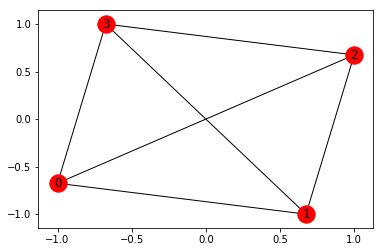

In [2]:
# First, let's create a sample 4 qubit Hamiltonian no h bias
dictH = {(0, 0): 1, (1, 1): 1, (2, 2): 1, (3, 3): -1, (0, 1): 1, (1, 2): 1, (2, 3): 1, (0, 3): 1, (1, 3): 1, (0, 2): 1}
H = DictRep(H = dictH, qpu = 'numerical', vartype = 'ising', encoding = 'logical')
graph = H.visualize_graph()
H.diag_H()

In [3]:
# set-up the problem
T = 1
s = 0.5
ftr = 0.5
num_runs = 50

# run many instances of the problem with a random partition each time
for i in range(num_runs):
    results = H.frem_comparison(T, s, ftr)

In [4]:
# analyze the data
data = H.data

# get averages of KL divergence
fKL_avg = data.loc[data['method'] == 'forward']['KL_div'].mean()
print("Average KL divergence of forward annealing over {} runs is {}".format(num_runs, fKL_avg))
rKL_avg = data.loc[data['method'] == 'reverse']['KL_div'].mean()
print("Average KL divergence of reverse annealing over {} runs is {}".format(num_runs, rKL_avg))
fremKL_avg = data.loc[data['method'] == 'frem']['KL_div'].mean()
print("Average KL divergence of frem annealing over {} runs is {}".format(num_runs, fremKL_avg))

# get minimum values
fKL_min = data.loc[data['method'] == 'forward']['KL_div'].min()
print("Minimum KL divergence of forward annealing over {} runs is {}".format(num_runs, fKL_min))
rKL_min = data.loc[data['method'] == 'reverse']['KL_div'].min()
print("Minimum KL divergence of reverse annealing over {} runs is {}".format(num_runs, rKL_min))
fremKL_min = data.loc[data['method'] == 'frem']['KL_div'].min()
print("Minimum KL divergence of frem annealing over {} runs is {}".format(num_runs, fremKL_min))

Average KL divergence of forward annealing over 50 runs is 0.3712979777868924
Average KL divergence of reverse annealing over 50 runs is 1.6664206159413888
Average KL divergence of frem annealing over 50 runs is 0.8283620619684997
Minimum KL divergence of forward annealing over 50 runs is 0.3712979777868924
Minimum KL divergence of reverse annealing over 50 runs is 1.6664206159413886
Minimum KL divergence of frem annealing over 50 runs is 0.21420614828894136
